A medical insurance company wants to predict an automatic system that can predict medical insurance cost for a person?


IMPORT THE LIBARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the Data 


In [2]:
df=pd.read_csv("/content/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

DATA ANALYSIS

In [8]:
#Statistical measures of dataset
df.describe()                            #it gives percentile

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


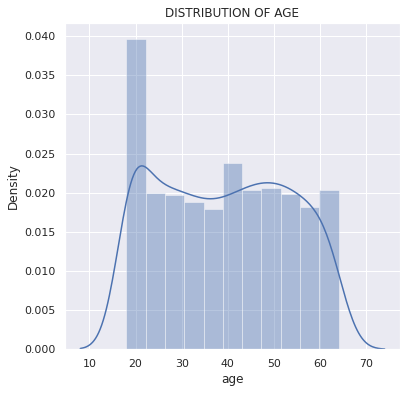

In [9]:
#distribution of age feature
sns.set()                                         #better theme to plots
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title("DISTRIBUTION OF AGE")
plt.show()

we can see that there are maximum in range of 20-23


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


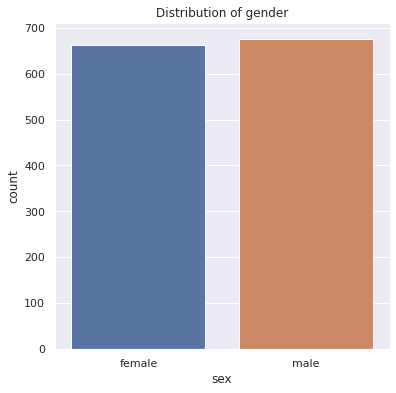

In [11]:
#Distribution of Gender 
plt.figure(figsize=(6,6))
sns.countplot(df["sex"])
plt.title("Distribution of gender")
plt.show()

In [12]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


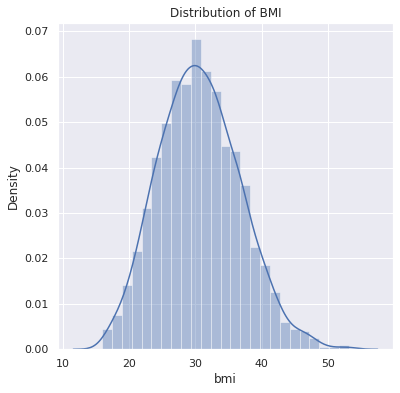

In [13]:
#Distribution of BMI
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("Distribution of BMI")
plt.show()

This is normal distribution and maxiumum are in mid.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


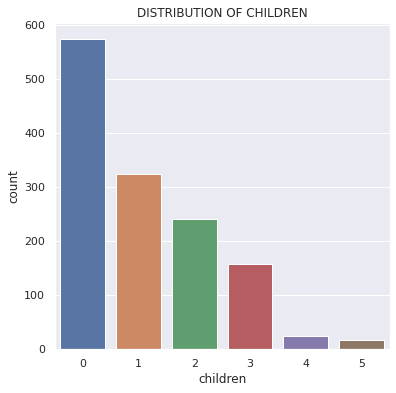

In [14]:
#Distribution of children
plt.figure(figsize=(6,6))
sns.countplot(df["children"])
plt.title("DISTRIBUTION OF CHILDREN")
plt.show()

In [15]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


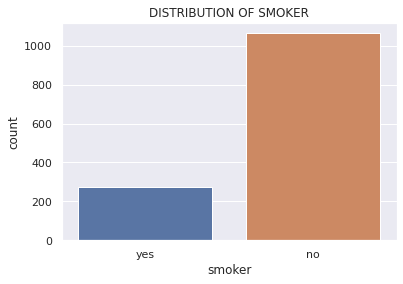

In [16]:
#Distribution of smoker
sns.countplot(df["smoker"])
plt.title("DISTRIBUTION OF SMOKER")
plt.show()

In [18]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


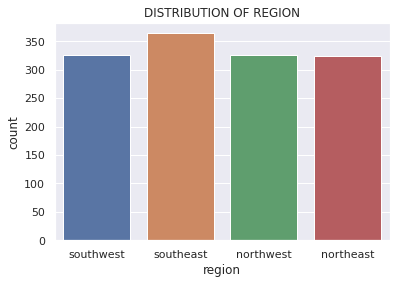

In [19]:
#Distribution of region
sns.countplot(df["region"])
plt.title("DISTRIBUTION OF REGION")
plt.show()

In [20]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

DATA PREPROCESSING

In [21]:
#Data encoding
#sex column
df.replace({"sex":{"male":0,"female":1}},inplace=True)
#smoker column
df.replace({"smoker":{"yes":0,"no":0}},inplace=True)
#region column
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


splitting into independent and dependent features

In [30]:
#independent features
x=df.iloc[:,:6]
#dependent features
y=df.iloc[:,6:]

In [26]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [31]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


Spliting the data into training and test

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1070, 6) (1070, 1) (268, 6) (268, 1)


MODEL TRAINING

In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [36]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MODEL EVALUATION

In [37]:
training_data_prediction=regressor.predict(x_train)

In [38]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix

In [39]:
r2_train=r2_score(y_train,training_data_prediction)
print("R squared value :",r2_train)

R squared value : 0.11617080854225859


In [41]:
test_data_prediction=regressor.predict(x_test)
r2_test=r2_score(y_test,test_data_prediction)
print("R squared value:",r2_test)


R squared value: 0.14835827844355753


BUILDING A PREDECTIVE SYSTEM

In [47]:
print("ENTER YOUR DETIALS")
age=int(input("enter your age:"))
sex=int(input("enter your gender as male:0,female:1 :-"))
bmi=int(input("enter your bmi:"))
children=int(input("enter no. of children:"))
smoker=int(input("are ou smoker yes:0,no:1 :-"))
region=int(input("enter your region 0,1,2,3 :-"))

#find a input data
input_data=(age,sex,bmi,children,smoker,region)

#convert data into array
input_array=np.asarray(input_data)

#reshape the data
input_array_reshape=input_array.reshape(1,-1)

ENTER YOUR DETIALS
enter your age:24
enter your gender as male:0,female:1 :-0
enter your bmi:34
enter no. of children:0
are ou smoker yes:0,no:1 :-0
enter your region 0,1,2,3 :-2


In [48]:
input_data

(24, 0, 34, 0, 0, 2)

In [52]:
prediciton=regressor.predict(input_array_reshape)
print(prediciton)

print("the insurance cost is USD",prediciton[0][0])

[[10502.17729522]]
the insurance cost is USD 10502.177295216514
